In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jamboree-education/Jamboree.csv


************************************************************************************
## <center>Enhancing Graduate Admissions: A Predictive Analysis for Jamboree Education<centerr>
************************************************************************************

### About Jamboree
*************
Jamboree has helped thousands of students gain admission to top colleges abroad through their GMAT, GRE, and SAT preparation programs. Their unique problem-solving methods are designed to maximize scores with minimal effort. Recently, Jamboree launched a feature on their website that allows students to assess their probability of getting into Ivy League colleges. This feature estimates the chances of graduate admission from an Indian perspective.

### Business Problem
*************************************************************************************************
Jamboree seeks to understand the key factors influencing graduate admissions and how these factors are interrelated. The goal is to use regression analysis techniques, including ridge and lasso regularization, to predict a student's chances of admission based on a variety of variables. This will help provide personalized insights and improve their admission prediction model.

### Objectives
***1. Analyze Key Admission Factors:*** Explore the relationship between various factors (e.g., GRE scores, CGPA, research experience) and their impact on admission chances to Ivy League colleges.<br>
***2. Regression Model Building:*** Build predictive models using regression analysis to predict admission chances, implementing Ridge and Lasso techniques to prevent overfitting and enhance model generalizability.<br>
***3. Assumption Testing:*** Test the underlying assumptions of linear regression models, such as linearity, normality, homoscedasticity, and multicollinearity, to ensure the validity of predictions.<br>
***4. Evaluate Model Performance:*** Assess the model’s performance using appropriate metrics like R-squared, Mean Absolute Error (MAE), and Mean Squared Error (MSE).<br>
***5. Factor Selection and Feature Engineering:*** Apply Lasso for automatic feature selection to identify the most significant variables affecting the chances of admission, and assess their relationships.<br>
***6. Regularization and Overfitting:*** Compare the performance of Ridge and Lasso regression models in mitigating overfitting while retaining important features.<br>
***7. Predictive Analysis for Admission Probability:*** Utilize the regression model to estimate and predict the probability of a student’s admission to top graduate schools based on their academic and other relevant metrics.

****************
### Libraries Overview

1. **Numpy (np)**: A fundamental package for scientific computing in Python. It provides support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

2. **Pandas (pd)**: An open-source data manipulation and analysis library. It offers data structures and operations for manipulating numerical tables and time series, making data manipulation and analysis more accessible.

3. **Seaborn (sns)**: A Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

4. **Matplotlib.pylab (plt)**: Part of the Matplotlib library, it offers a procedural interface to the matplotlib object-oriented plotting library. It's used for creating static, animated, and interactive visualizations in Python.

5. **Scikit-learn (sklearn)**: Scikit-learn is a comprehensive machine learning library in Python that provides simple and efficient tools for data analysis and modeling. It is widely used for both beginner and advanced machine learning tasks due to its ease of use and extensive documentation.

6. **Statsmodels (sm)**: A Python package for statistical modeling. It provides classes and functions for estimating statistical models, performing hypothesis tests, and data exploration. It is often used for more complex statistical analysis than what's available in scikit-learn.

*************************
### 1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import zscore
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings

# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set the style for seaborn
sns.set(style="whitegrid")

********************************
### 2. Load the Dataset

In [3]:
# Load the dataset
df = pd.read_csv("/kaggle/input/jamboree-education/Jamboree.csv")

# Display initial dataset shape and a few rows
print(f"The initial shape of dataframe is: {df.shape}")
df.head()

The initial shape of dataframe is: (500, 9)


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


*****************************
### 3. Exploratory Data Analysi

#### 3.1 Dataset Overviews

In [4]:
# Display the structure of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


#### Jamboree Dataset Overview

The dataset consists of 500 entries detailing information about applicants and their likelihood of admission to a graduate program. Each entry includes unique identifiers, scores from standardized tests, ratings of recommendation strength, academic performance metrics, research experience, and the calculated chance of admission. Below is an overview of the dataset's structure and features:<br>
- **Serial No.:** Unique ID for each applicant
- **GRE Score:** Graduate Record Examination score, ranging from 0 to 340
- **TOEFL Score:** Test of English as a Foreign Language score, ranging from 0 to 120
- **University Rating:** Rating of the university (scale of 1 to 5)
- **SOP:** Strength of the Statement of Purpose, measured on a scale of 1 to 5
- **LOR:** Strength of Letters of Recommendation, measured on a scale of 1 to 5
- **CGPA:** Undergraduate Cumulative Grade Point Average, scaled to 10
- **Research:** Indicator of research experience (0 = No, 1 = Yes)
- **Chance of Admit:** Probability of admission, ranging from 0 to 1


The dataset includes both integer and float data types, allowing for numerical analyses and modeling tasks.

In [5]:
# Drop 'Serial No.'

df = df.drop(columns=['Serial No.'])

In [6]:
# Count missing values
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

The dataset contains 500 entries across 9 columns, and the missing values count for all columns is 0, indicating that the dataset is complete and does not require imputation for missing data.

In [7]:
# Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


The dataset provides a comprehensive foundation for conducting regression analysis to predict the **Chance of Admit** based on multiple applicant features.  

- The continuous nature of predictors like **GRE Score**, **CGPA**, and **TOEFL Score** makes them ideal for inclusion in a linear regression model.  
- Relationships can be quantified by analyzing **correlations** and examining **linear trends**.  
- **University Rating** and **Research** can be encoded and used as predictors to capture their impact on admission chances.  
- Variables like **GRE Score** and **CGPA** may be correlated, necessitating **Variance Inflation Factor (VIF)** analysis to identify multicollinearity issues.

In [8]:
# Count unique values in each column
unique_counts = df.nunique()

# Print the count of unique values for each column
for column in df.columns:
    print(f"Unique values in '{column}': {unique_counts[column]}")

Unique values in 'GRE Score': 49
Unique values in 'TOEFL Score': 29
Unique values in 'University Rating': 5
Unique values in 'SOP': 9
Unique values in 'LOR ': 9
Unique values in 'CGPA': 184
Unique values in 'Research': 2
Unique values in 'Chance of Admit': 61


This summary provides a comprehensive view of the diversity within each categorical column in the dataset, highlighting the range and distribution of unique values for each feature.

In [9]:
# Find duplicates across all columns
duplicate_rows = df[df.duplicated()]

print(duplicate_rows)

Empty DataFrame
Columns: [GRE Score, TOEFL Score, University Rating, SOP, LOR , CGPA, Research, Chance of Admit]
Index: []


The dataframe has no duplicate rows.

#### 3.2 Univariate Analysis

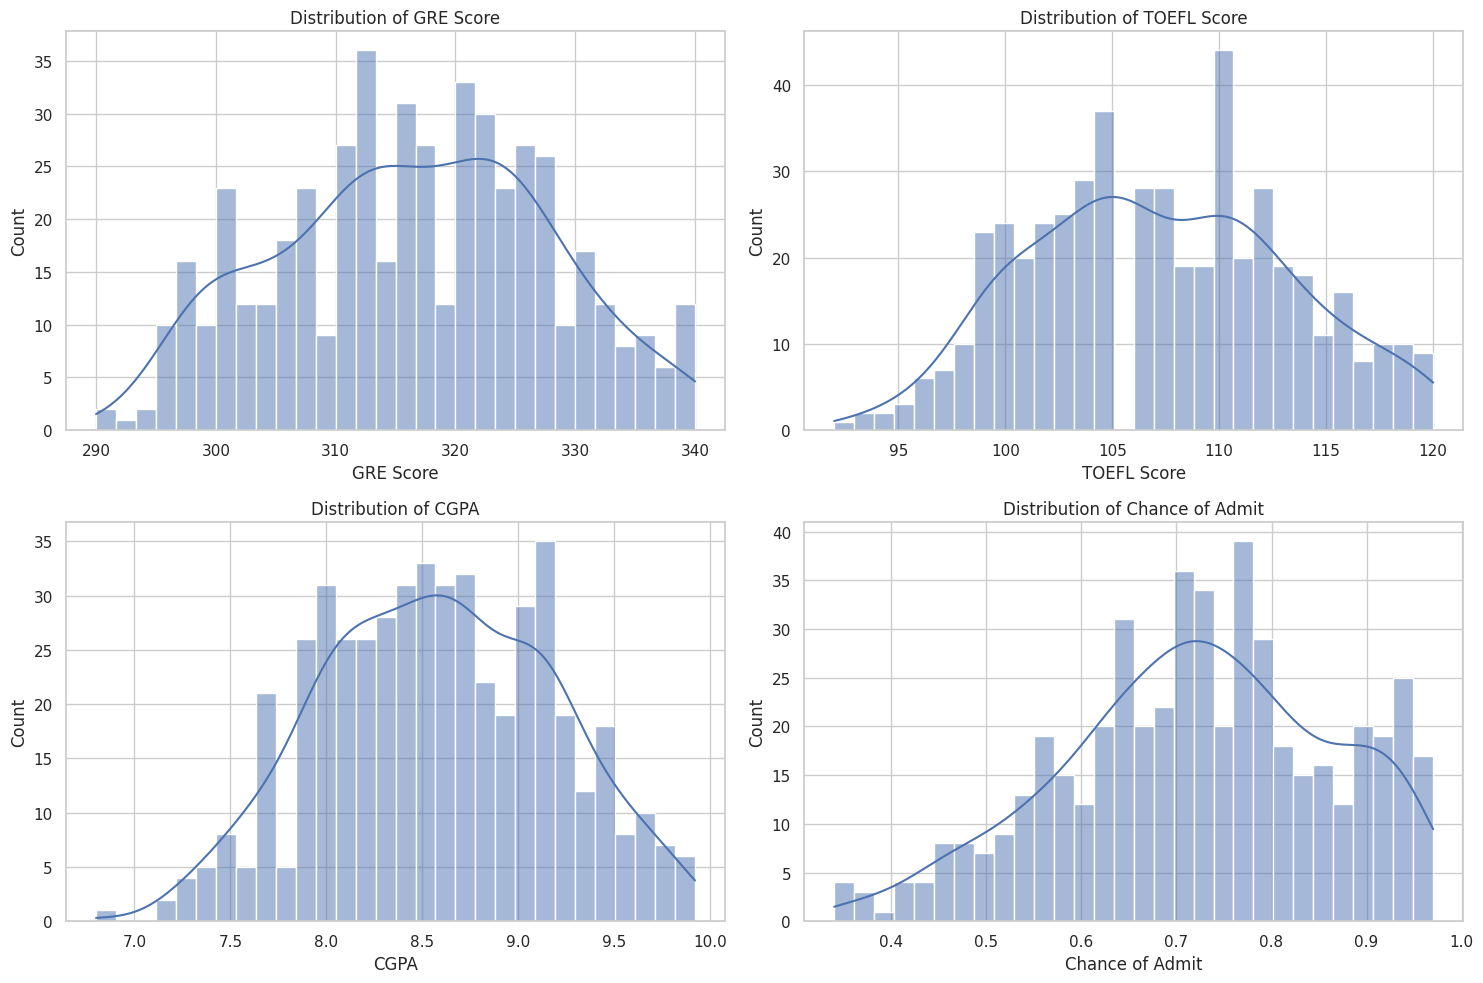

In [10]:
# Plot distributions of continuous variables
continuous_vars = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']
plt.figure(figsize=(15, 10))
for i, var in enumerate(continuous_vars, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[var], kde=True, bins=30)
    plt.title(f'Distribution of {var}')
plt.tight_layout()
plt.show()

The distribution of **GRE Scores** is approximately normal, with most scores between 310-325. A slight right skew indicates a few candidates with exceptionally high scores (above 330), suggesting competitive GRE performance overall.

**TOEFL Scores** are roughly normal, peaking around 105-110. A slight left skew shows most candidates score relatively high, reflecting strong English proficiency.

The distribution of **CGPA** peaks between 8.0 and 9.0 and is slightly right-skewed as scores approach 10. This indicates most candidates have above-average academic performance, with a few achieving exceptional GPAs.

The distribution of **Chance of Admit** peaks between 0.6 and 0.8, with fewer candidates having a very low probability (below 0.4). A left skew highlights that most candidates are moderately to highly competitive for admission.

Overall, candidates in the dataset exhibit strong academic profiles and competitive admission probabilities. Slight skews in some distributions reflect variability while maintaining reasonable trends typical of admissions data.

#### 3.3 Bivariate Analysis

<Figure size 1500x1000 with 0 Axes>

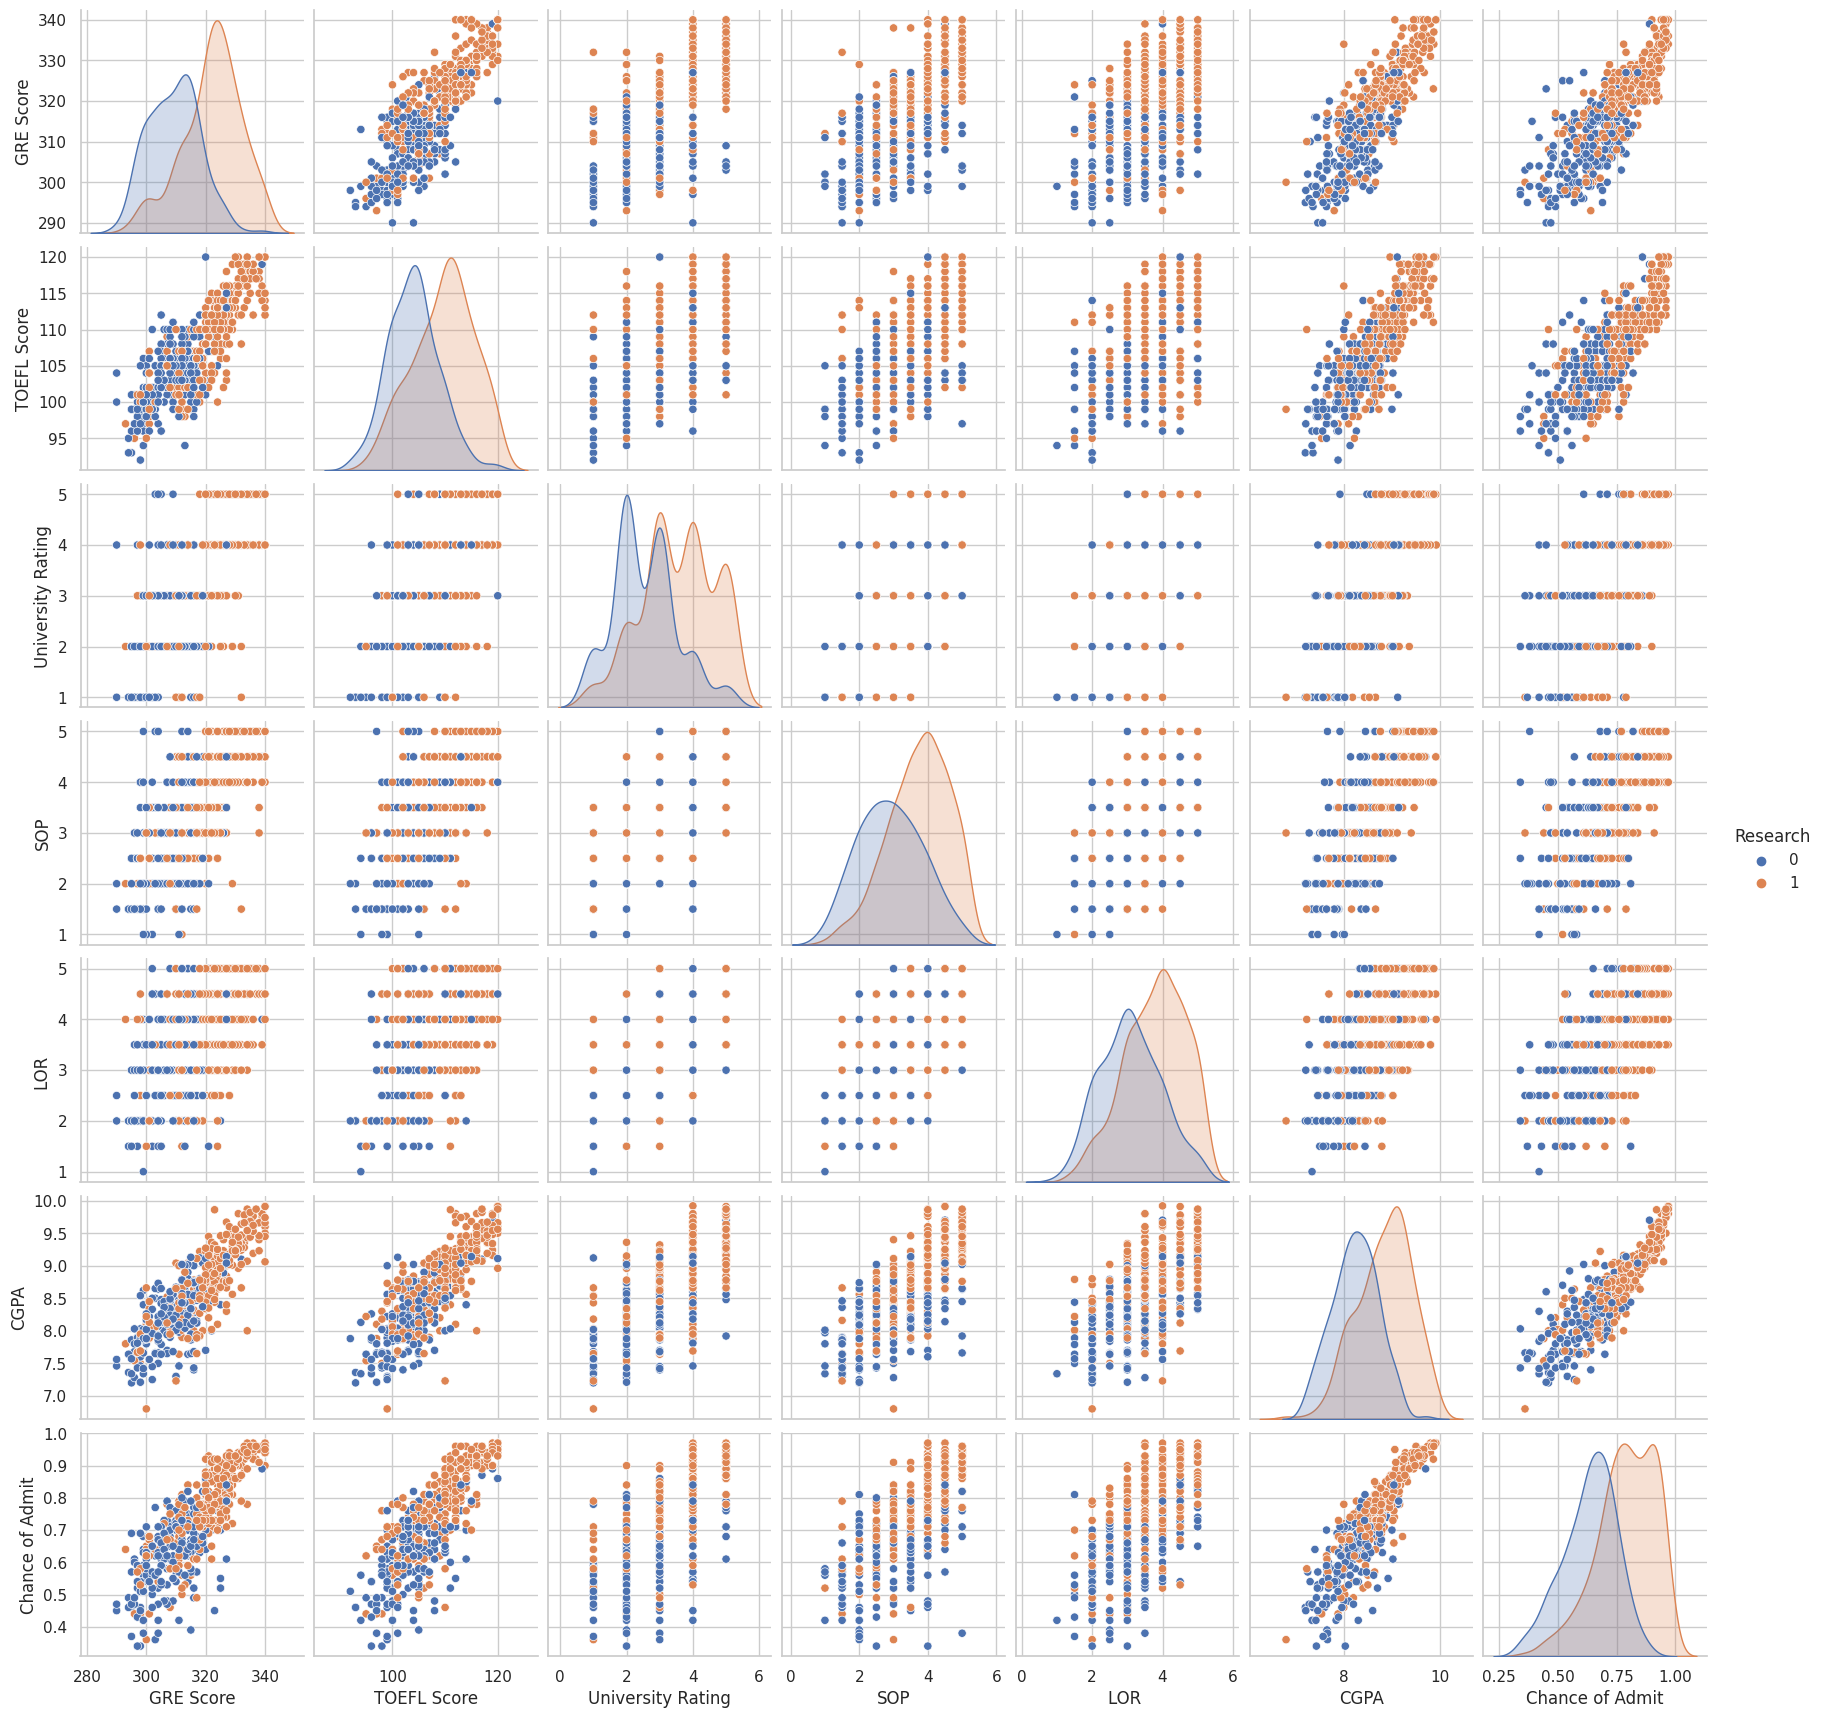

In [11]:
# Plot relationships
plt.figure(figsize=(15, 10))
sns.pairplot(df, diag_kind='kde', hue='Research')
plt.show()

The KDE plots illustrate the distribution of features such as GRE Score, TOEFL Score, University Rating, SOP, LOR, CGPA, and Chance of Admit, categorized by research experience (Research = 0 or 1). Candidates with research experience (Research = 1) tend to have higher GRE, TOEFL, and CGPA values, indicating stronger academic profiles.

Scatter plots show pairwise relationships between variables, also categorized by research experience. GRE, TOEFL, and CGPA scores have a positive correlation with the Chance of Admit, with candidates having research experience showing higher admission chances for similar scores. While University Rating, SOP, and LOR also contribute positively, their impact is less pronounced.

Higher CGPA often correlates with better GRE and TOEFL scores, reflecting overall strong academic performance. Research experience is a key differentiator, significantly boosting admission chances even when academic metrics are comparable.

#### 3.4 Correlation Analysis

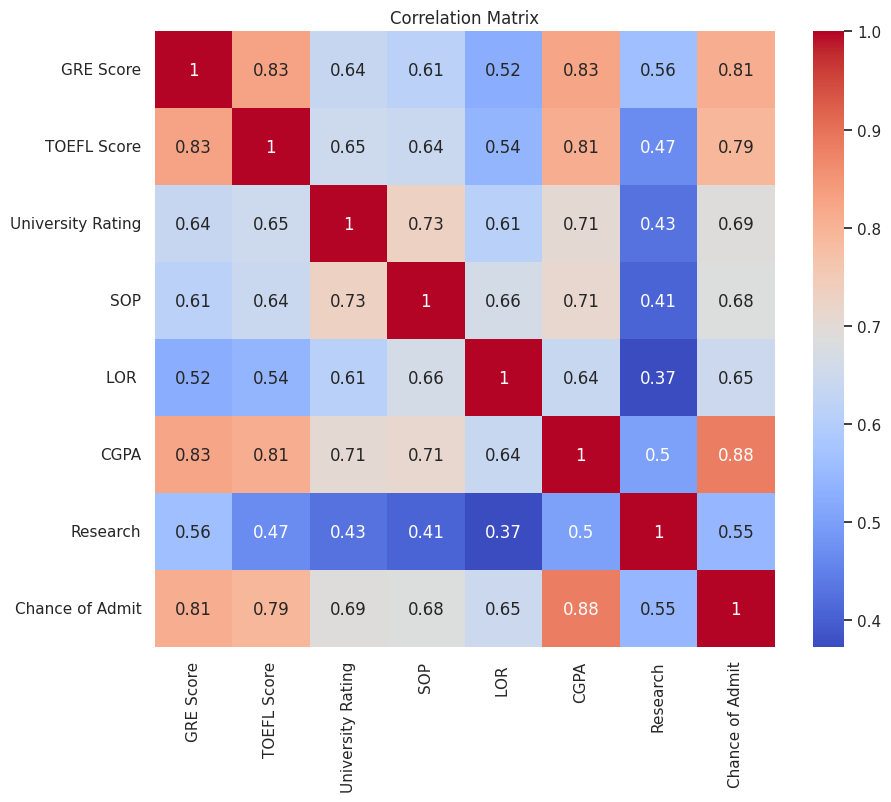

In [12]:
# Heatmap for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The correlation matrix indicates that CGPA, GRE Score, and TOEFL Score have strong positive correlations with the Chance of Admit. Variables such as University Rating, SOP, and LOR also show moderate correlations. Research, while relevant, shows a weaker correlation. The high correlation between predictors like GRE Score and TOEFL Score suggests potential multicollinearity, which will be addressed in subsequent modeling steps.

**************************************************************************************************
### 4. Data Preprocessing

Data preprocessing is essential for improving the quality and efficiency of analysis. It involves cleaning, transforming, and standardizing raw data, addressing missing values, normalizing scales, handling outliers, and encoding categorical variables. Proper preprocessing optimizes data quality, ensuring better model performance.

#### 4.1 Outlier Detection

Outlier detection helps identify anomalies that could skew analysis and impact machine learning model performance. Outliers, which may represent errors or rare events, must be carefully addressed to maintain the integrity of the dataset and the accuracy of insights.

In the following code, boxplots visualize the distribution of key variables, highlighting potential outliers in columns like 'GRE Score', 'TOEFL Score', and 'CGPA':

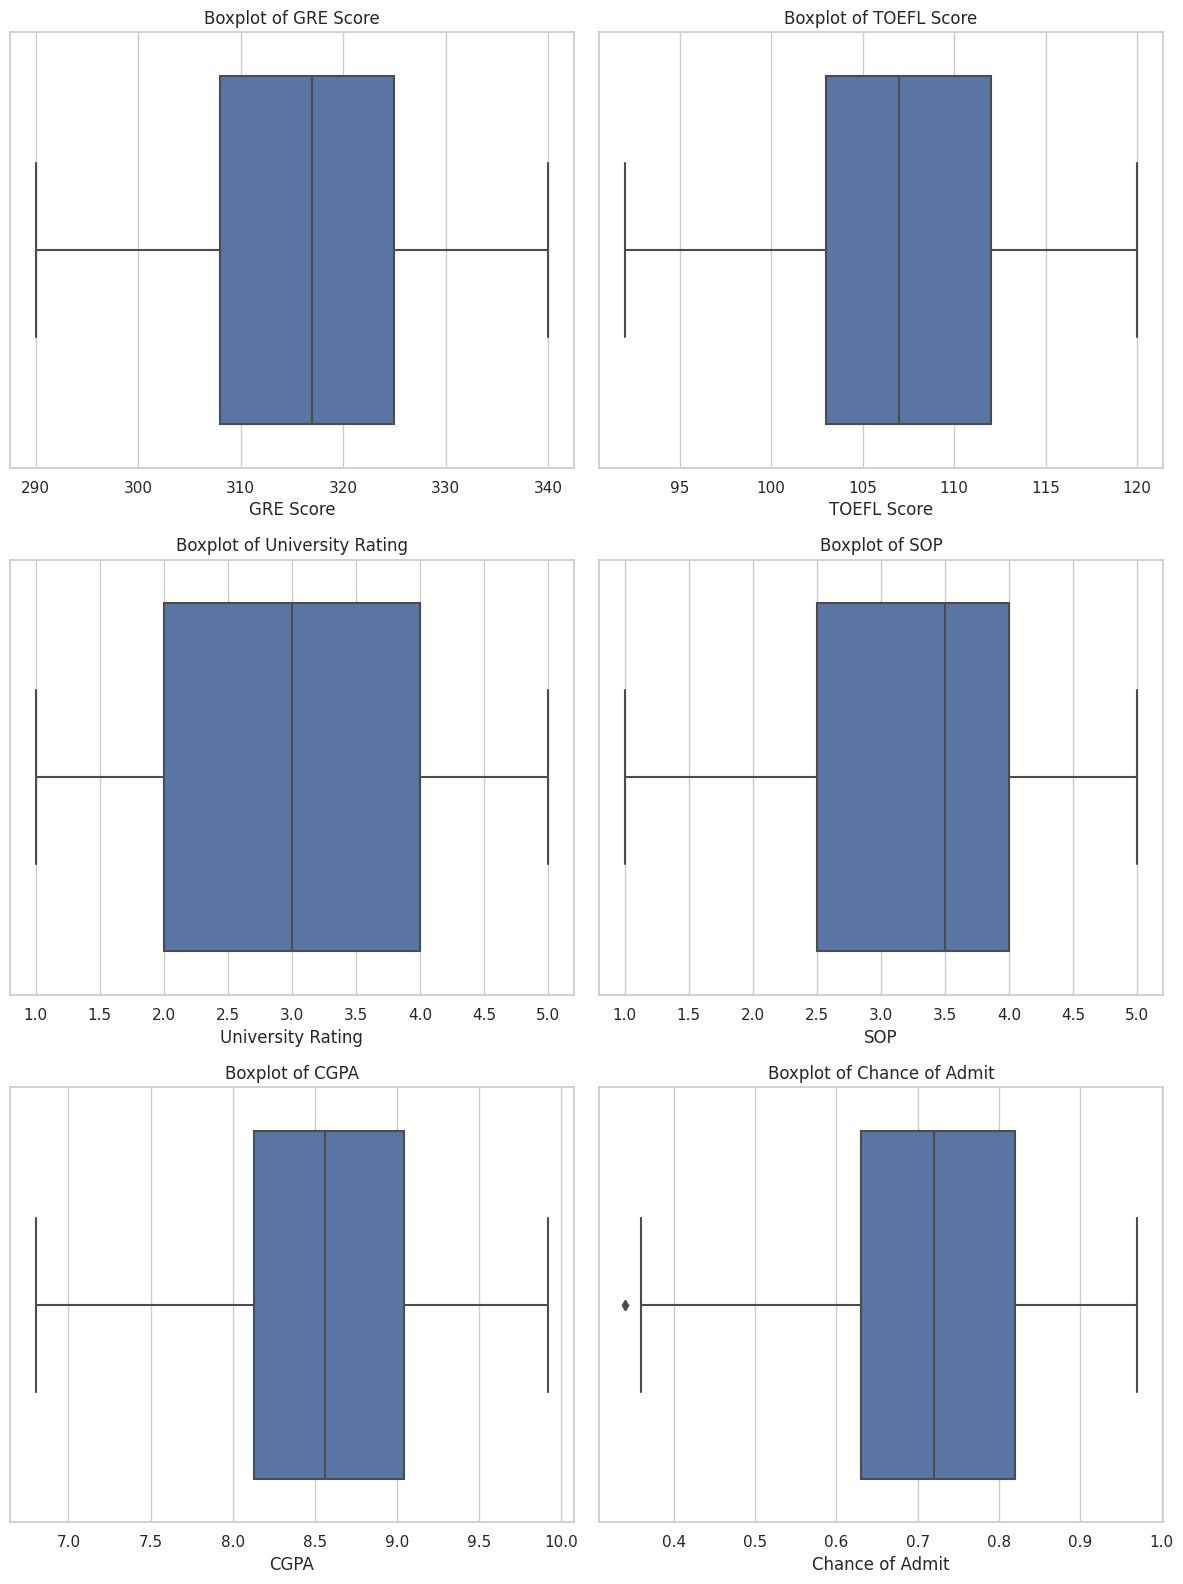

In [13]:
cols = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA', 'Chance of Admit']

fig, axes = plt.subplots(3, 2, figsize=(12, 16))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

The **GRE Score** has a median of around 315. The interquartile range (IQR) indicates that most candidates score between approximately 310 and 325. There are no visible outliers in this data, suggesting a normal distribution of GRE scores among candidates.

For the **TOEFL Score**, the median is about 105, with most scores ranging between 100 and 110. The absence of outliers suggests consistency in TOEFL performance across the candidates.

The **University Rating** has a median of 3 (on a scale of 5). The ratings are evenly distributed, with no visible outliers, indicating that universities with varying ratings are well-represented in the dataset.

The **SOP (Statement of Purpose Strength)** scores have a median of 3 (on a scale of 5). The scores vary widely between 1 and 5, showing differences in the strength of candidates' SOPs. There are no outliers, suggesting a balanced evaluation process for this metric.

The **CGPA** has a median of approximately 8.5. Most candidates have a CGPA between 8.0 and 9.0, with a few as low as 7.0 and as high as 10.0. However, there is a single outlier below 7.5, though the overall distribution remains compact.

The **Chance of Admit** has a median of 0.7. Most candidates fall between 0.6 and 0.8 in terms of their probability of admission. There is a slight outlier near 0.4, indicating one candidate with a significantly lower chance of admission.

In summary, most features exhibit a balanced distribution without significant outliers, except for slight deviations in **CGPA** and **Chance of Admit**. Candidates generally perform well in **GRE**, **TOEFL**, and **CGPA** metrics, which are closely associated with higher admission probabilities. The majority of candidates have a relatively high chance of admission, with the median probability being around 70%. These insights can help universities identify strong candidates based on both academic metrics and subjective evaluations.

In [14]:
# Outlier Detection using Z-scores

# Columns to check for outliers
columns_to_check = ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'CGPA', 'Chance of Admit']

# Calculate Z-scores
z_scores = np.abs(zscore(df[columns_to_check]))

# Threshold for Outliers
threshold = 3
df = df[(z_scores < threshold).all(axis=1)]
print(f"Data shape after outlier removal: {df.shape}")

Data shape after outlier removal: (500, 8)


The Z-score analysis confirms no significant outliers in the specified columns, as all data points fall within three standard deviations of the mean, indicating acceptable variation without extreme deviations.

#### 4.2 Data Splitting

Before scaling the data, it's important to split it into training and testing sets. This avoids data leakage, ensuring that the test set remains unseen during preprocessing. If scaling occurs before splitting, information from the test set could influence the training data, leading to unrealistic performance estimates.

In [15]:
# Define features and target variable
X = df.drop(columns=['Chance of Admit'])
y = df['Chance of Admit']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 4.3 Feature Scaling

Feature scaling standardizes data to ensure that no variable dominates others due to scale differences. To prevent data leakage, scaling is applied only to the training set, and the same transformation is applied to the test set.


In [16]:
# Feature scaling using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

This process ensures that the model evaluates data on a level playing field, leading to more accurate performance metrics.

**************************************************************
### 5. Baseline Model Building
******************************************************
#### 5.1 Linear Regression

In this section, we build a linear regression model to predict the target variable using the training data. We use the `statsmodels` library for this, which provides a comprehensive summary of the model's fit and significance.

In [17]:
# Add constant for statsmodels
X_train_sm = sm.add_constant(X_train)

# Build model
lr_model = sm.OLS(y_train, X_train_sm).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          3.41e-142
Time:                        08:42:57   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -1.4214      0.12

#### Model Fit and Significance:
- **R-squared**: 0.821  
  This indicates that 82.1% of the variance in the "Chance of Admit" is explained by the model, suggesting a good fit for the data.
  
- **Adjusted R-squared**: 0.818  
  This value accounts for the number of predictors in the model, adjusting for the degrees of freedom. It is very close to R-squared, indicating that the model has a good fit even when considering the number of features.

- **F-statistic**: 257.0  
  This measures the overall significance of the regression model. A high value suggests that the model is statistically significant. The associated p-value (Prob (F-statistic): 3.41e-142) is extremely low, indicating that the model is highly significant.

#### Key Insights from the Coefficients:
  
- **GRE Score**: The coefficient of 0.0024 indicates that for each additional point in GRE score, the Chance of Admit increases by 0.0024, and this effect is statistically significant (p-value = 0.000).

- **TOEFL Score**: An increase in TOEFL score by 1 point results in a 0.0030 increase in the Chance of Admit, with a statistically significant p-value (0.002).

- **University Rating**: The coefficient of 0.0026 suggests a positive relationship, but the p-value (0.541) is not statistically significant, meaning it may not be a crucial predictor in this model.

- **SOP (Statement of Purpose)**: A coefficient of 0.0018, with a high p-value (0.721), suggests that SOP may not have a significant impact on the Chance of Admit in this case.

- **LOR (Letter of Recommendation)**: The coefficient of 0.0172 indicates a positive relationship, and with a p-value of 0.000, it is statistically significant. A stronger LOR correlates with a higher Chance of Admit.

- **CGPA**: The CGPA variable shows the largest effect, with a coefficient of 0.1125, indicating that a higher CGPA is strongly associated with a higher Chance of Admit, and this relationship is highly statistically significant (p-value = 0.000).

- **Research**: The Research variable also shows a positive effect (coefficient = 0.0240) with a statistically significant p-value of 0.001, suggesting that having research experience increases the Chance of Admit.

#### Diagnostics:
- **Durbin-Watson Statistic**: 2.050  
  This statistic tests for autocorrelation in the residuals. A value close to 2 suggests no autocorrelation, and 2.050 is within the acceptable range, meaning the residuals are likely independent.

- **Skewness**: -1.107  
  The negative skew indicates that the residuals are skewed to the left, meaning there are more lower residuals than higher ones.

- **Kurtosis**: 5.551  
  This value suggests that the residuals are leptokurtic (peaked), which might indicate the presence of outliers.

- **Condition Number**: 13704  
  This large value suggests that there might be strong multicollinearity between some of the independent variables, which could cause instability in the coefficient estimates.

The model explains a good portion of the variance in "Chance of Admit" with an R-squared value of 0.821, but the presence of multicollinearity and non-normality in the residuals suggest that the model might benefit from further refinement.

**************************************************************
### 6. Assumption Testing

To validate the linear regression model, we test key assumptions like multicollinearity, residual linearity, normality, and homoscedasticity. Below is the code for each check.

#### 6.1 Multicollinearity (VIF)

In this section, we assess the multicollinearity in our dataset using Variance Inflation Factor (VIF). Multicollinearity arises when predictor variables in a regression model are highly correlated, which can lead to unstable coefficient estimates. By calculating the VIF, we can identify which features contribute to multicollinearity, helping us decide whether to remove or adjust those features to improve model stability and accuracy.

In [18]:
# Calculate VIF
X = df.drop(columns=["Chance of Admit"])
X = sm.add_constant(X)  # Adding constant for statsmodels
vif = pd.DataFrame()
vif["Feature"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif = vif[vif["Feature"] != "const"]  # Exclude constant term
print(vif)

             Feature          VIF
0          GRE Score  1284.067901
1        TOEFL Score  1141.169527
2  University Rating    20.408187
3                SOP    34.837142
4               LOR     30.249378
5               CGPA   933.060108
6           Research     2.822705


The high VIF values for GRE, TOEFL, CGPA, and other features indicate significant multicollinearity within the dataset. This can lead to unstable estimates in the regression model, so it's essential to either remove, combine, or apply regularization techniques (like Ridge or Lasso) to handle the issue. Regularization can help mitigate the impact of multicollinearity and improve model performance.

#### Multicollinearity (VIF) with scaled features

In [19]:
# Calculate VIF with scaled features
X = df.drop(columns=["Chance of Admit"])
X = sm.add_constant(X)  # Adding constant for statsmodels

# Calculate VIF
vif = pd.DataFrame()
vif["Feature"] = X_train.columns  # Using columns from the dataframe, not X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train_scaled, i) for i in range(X_train_scaled.shape[1])]
vif = vif[vif["Feature"] != "const"]  # Exclude constant term

# Print VIF
print(vif)

             Feature       VIF
0          GRE Score  4.489983
1        TOEFL Score  3.664298
2  University Rating  2.572110
3                SOP  2.785764
4               LOR   1.977698
5               CGPA  4.654540
6           Research  1.518065


The VIF values for the scaled features show a significant reduction compared to the unscaled data, which indicates that scaling has helped in reducing multicollinearity.

Generally, VIF values below 5 are considered acceptable, though values above 10 are indicative of problematic multicollinearity. The VIF values here suggest that while there is still some multicollinearity present, it's significantly reduced from the original, unscaled features. You can proceed with the regression models, but further reduction (such as through regularization or feature selection) could further improve model performance and stability.

#### 6.2 Residual Analysis

Residual analysis helps evaluate the goodness of fit of a regression model by examining the differences between actual and predicted values. Ideally, residuals should be randomly scattered around zero, indicating the model has captured the relationships in the data without systematic errors.

Mean of Residuals: 3.920475055707584e-16


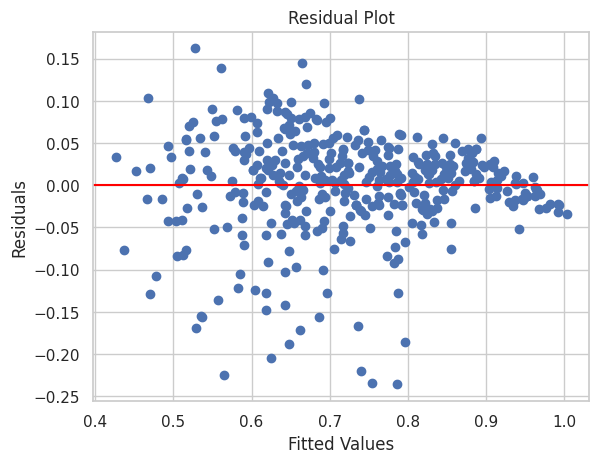

In [20]:
# Residuals
residuals = lr_model.resid

# Mean of residuals
print(f"Mean of Residuals: {residuals.mean()}")

# Residual plot
plt.scatter(lr_model.fittedvalues, residuals)
plt.axhline(0, color='red')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

The mean of residuals, approximately 3.92 × 10⁻¹⁶, indicates they average out to zero, suggesting no systematic overprediction or underprediction. The residual plot shows points scattered around the zero line, supporting the assumptions of linearity and independence. However, a slight funnel shape hints at potential heteroscedasticity, warranting further investigation.

To improve the model, addressing heteroscedasticity through transformations of the dependent variable or weighted regression could help. Additionally, regularization techniques like Ridge or Lasso may assist if multicollinearity is a concern.

#### 6.3 Homoscedasticity

Homoscedasticity refers to the assumption that the variance of residuals is constant across all levels of the independent variables. To test this assumption, we plot the residuals against the predicted values. If the residuals exhibit a random scatter with no clear pattern, the assumption holds. However, if a pattern is present, it suggests heteroscedasticity, which can lead to inefficiencies in the model's estimates and biased results.

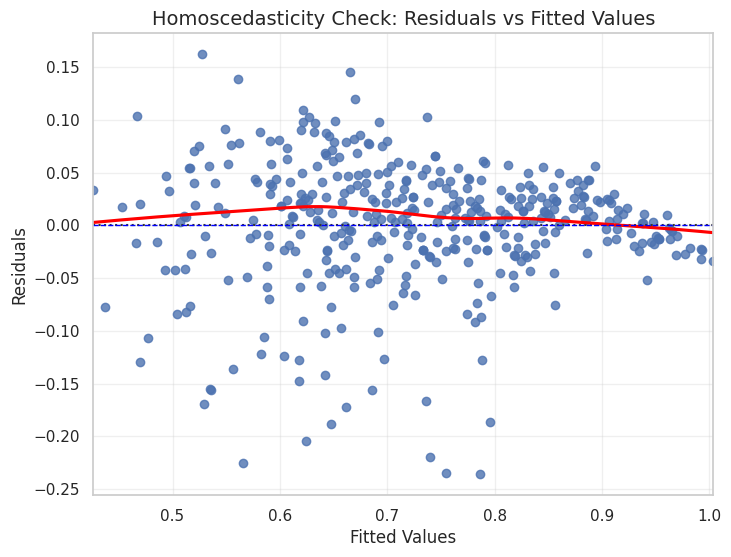

In [21]:
# Plot to check Homoscedasticity
plt.figure(figsize=(8, 6))  
sns.residplot(x=lr_model.fittedvalues, y=residuals, lowess=True, line_kws={"color": "red"})
plt.axhline(0, color='blue', linestyle='--', linewidth=1) 
plt.xlabel("Fitted Values", fontsize=12)  
plt.ylabel("Residuals", fontsize=12)  
plt.title("Homoscedasticity Check: Residuals vs Fitted Values", fontsize=14)
plt.grid(alpha=0.3)  
plt.show()

In the plot above, we observe a fan-shaped pattern, where the spread of residuals increases as the predicted values increase. This suggests heteroscedasticity, indicating that the variance of the residuals is not constant. While the residuals are centered around zero, the increasing spread points to potential issues with the homoscedasticity assumption. This violation could affect model performance, particularly in linear regression where constant variance is critical for valid inference.

In [22]:
# Perform White's test
from statsmodels.stats.diagnostic import het_white

# Using the residuals and exogenous variables matrix
_, p_value, _, _ = het_white(lr_model.resid, lr_model.model.exog)
print(f'White’s test p-value: {p_value:.5f}')

White’s test p-value: 0.00079


To further investigate, we performed White's test, which resulted in a p-value of 0.00079. Since the p-value is less than 0.05, we reject the null hypothesis, confirming the presence of heteroscedasticity. This indicates that the residuals exhibit non-constant variance, which could impact the reliability of statistical inferences. To address this issue, robust standard errors can be employed to correct for heteroscedasticity and enhance the accuracy of the model's estimates.

#### 6.4 Normality of Residuals

One of the key assumptions in linear regression is that the residuals are normally distributed. To check for this assumption, we use a Q-Q (Quantile-Quantile) plot, which compares the distribution of the residuals to a standard normal distribution. If the points on the Q-Q plot closely follow the diagonal line, it suggests that the residuals are normally distributed. Deviations from the line, particularly at the extremes, may indicate a departure from normality, which could impact the model's performance and the validity of statistical inferences.

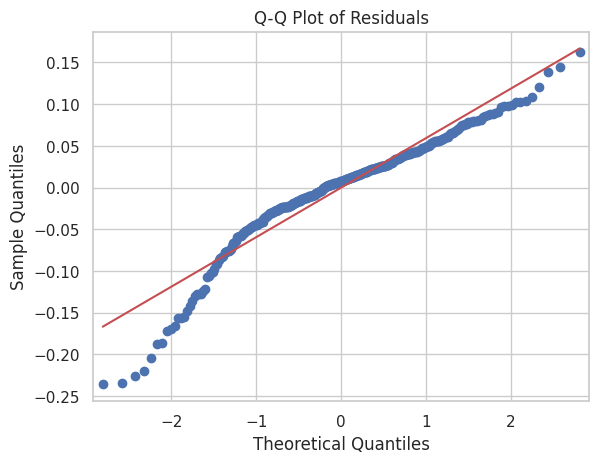

In [23]:
# Q-Q plot for Normality of Residuals

sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

Normality of residuals is a key assumption in linear regression. To check this, we use a Q-Q (Quantile-Quantile) plot, which compares the distribution of residuals to a standard normal distribution. If the points closely follow the diagonal line, it suggests normality. In our case, the central region of the plot aligns well with the line, indicating normality in the middle of the distribution. However, there are slight deviations at the extreme ends, suggesting minor departures from normality in the tails.

In [24]:
from scipy.stats import shapiro

# Perform Shapiro-Wilk test
stat, p_value = shapiro(residuals)
print(f'Shapiro-Wilk test p-value: {p_value}')

Shapiro-Wilk test p-value: 7.734906730601272e-13


To further assess normality, we performed the Shapiro-Wilk test, which resulted in a very small p-value (7.735 × 10⁻¹³). Since the p-value is much smaller than 0.05, we reject the null hypothesis, indicating that the residuals are not normally distributed. While the minor non-normality observed may not severely impact the model's validity, it could affect statistical tests and confidence intervals.

**************************************************************
### 7.Model Building
**************************************************************

#### 7.1 Linear Regression with scaled features
In this part of the analysis, we build the linear regression model using scaled features. In contrast to the earlier model where we used the raw data, scaling the features helps to standardize them, ensuring that the model does not give undue weight to variables with larger numerical ranges. We will use the `statsmodels` library to perform Ordinary Least Squares (OLS) regression and provide a summary of the model's fit and significance.g

In [25]:
# Add constant for statsmodels (for OLS)
X_train_sm = sm.add_constant(X_train_scaled)

# Build and summarize OLS regression model
lr_model = sm.OLS(y_train, X_train_sm).fit()
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Wed, 11 Dec 2024   Prob (F-statistic):          3.41e-142
Time:                        08:43:00   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7242      0.003    241.441      0.0

The R-squared and Adjusted R-squared values remain the same before and after scaling, indicating that the scaling did not impact the goodness of fit of the model. This suggests that scaling the features didn’t change the explained variance of the target variable (Chance of Admit). The model still explains about 82.1% of the variance in the target variable, with a very slight difference between R-squared and Adjusted R-squared, which is typical in OLS regression when multiple predictors are included.

After scaling, the coefficients reflect the change in the target variable for a one standard deviation change in each feature. This can make it easier to compare the relative importance of features, but the interpretation becomes less intuitive since the scale of the features has changed.CGPA (`x6`) is the most influential predictor of admission chances, followed by GRE Score (`x1`) and TOEFL Score (`x2`).University Rating (`x3`) and LOR (`x4`) do not significantly contribute to the model. These could potentially be removed in future iterations to simplify the model without impacting performance.

The p-values after scaling remain the same for the significant variables and insignificant variables. No features became significant after scaling, and no features became insignificant either. This shows that scaling doesn't affect the statistical significance of the predictors in the model.

After scaling, the condition number decreases significantly, which suggests that scaling has helped mitigate some multicollinearity issues. This is expected since scaling standardizes the range of all features, reducing the impact of highly correlated variables with large disparities in scale.

In conclusion, scaling does not change the model's performance significantly, but it makes the model's coefficients more comparable and mitigates potential multicollinearity.

**************************************************
#### 7.2 Ridge and Lasso Regression

In this section, we perform Ridge and Lasso regression to address multicollinearity and enhance model generalization. Both methods are regularized versions of linear regression. Ridge regression penalizes large coefficients while retaining all features, while Lasso regression not only penalizes large coefficients but also performs feature selection by driving some coefficients to zero. We will train and evaluate both models using the Mean Squared Error (MSE), R-squared, and Mean Absolute Error (MAE) metrics to assess their performance.

In [26]:
# Function to train and evaluate model
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    return predictions, mse, r2, mae

# Models and their hyperparameters
models = {
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.01)
}

# Train and evaluate each model
for name, model in models.items():
    predictions, mse, r2, mae = train_and_evaluate(model, X_train, y_train, X_test, y_test)
    print(f"{name} Predictions:", predictions)
    print(f"{name} MSE:", mse)
    print(f"{name} R-squared:", r2)
    print(f"{name} MAE:", mae)

Ridge Predictions: [0.91367965 0.79395112 0.57479573 0.70663377 0.81518102 0.86171584
 0.47399128 0.64736734 0.82181292 0.80722897 0.72256215 0.72543717
 0.65803624 0.9372455  0.82253634 0.50884807 0.83992267 0.59606014
 0.53272611 0.5719629  0.66560762 0.55360214 0.7215527  0.7954205
 0.78062438 0.60142383 0.94813154 0.84738669 0.62831948 0.74329477
 0.55578448 0.72952553 0.54538365 0.86038923 0.6585096  0.73726705
 0.55305805 0.9568376  0.64359815 0.71040367 0.96978738 0.57458421
 0.66992253 0.8584676  0.94071377 0.57665981 0.95794788 0.8392417
 0.79660896 0.9253355  0.88686834 0.56381952 0.70336572 0.5276389
 0.95384274 0.60038163 0.95464751 0.73899786 0.66124104 0.50126689
 0.62711134 0.67942389 0.59817522 0.59389737 0.44075314 0.59110178
 0.86617428 0.89773193 0.65789752 0.70601756 0.61721812 0.78614188
 0.69074031 0.56444502 0.55287583 0.6502501  0.84680042 0.86384923
 0.53819052 0.63111956 0.76941642 0.84744713 0.6175196  0.84648105
 0.73505761 0.66910755 0.60428338 0.74031797 0

#### 1. Ridge Regression
- **Predictions**: The predicted values range between 0.44 and 0.97, showing a relatively wide distribution. This indicates the model is predicting continuous values across a broad range.
- **MSE (Mean Squared Error)**: **0.0037**  
  - This is a low MSE, suggesting that the Ridge model has made relatively accurate predictions, with the squared differences between predicted and actual values being small.
- **R-squared (R²)**: **0.818**  
  - This is a high R² value, which means that about **81.8%** of the variance in the target variable is explained by the model. This indicates a good fit for the data.
- **MAE (Mean Absolute Error)**: **0.0429**  
  - The MAE is also low, suggesting that on average, the model’s predictions are off by around **0.0429** units from the actual values. This implies the model has good accuracy in predicting individual values.

#### 2. Lasso Regression
- **Predictions**: The predicted values range between 0.47 and 0.95, showing a similar distribution to the Ridge model, but the values tend to be slightly lower.
- **MSE (Mean Squared Error)**: **0.0056**  
  - The MSE is higher than that of Ridge, indicating that the Lasso model has higher prediction errors on average.
- **R-squared (R²)**: **0.727**  
  - This R² is lower than Ridge, meaning that Lasso explains **72.7%** of the variance in the target variable, which is still good but less effective than Ridge.
- **MAE (Mean Absolute Error)**: **0.0540**  
  - The MAE for Lasso is slightly higher than Ridge, indicating that the average error in prediction is **0.0540** units, which is higher than that of the Ridge model. This suggests that Lasso might not be as precise in its individual predictions as Ridge.

**Ridge Regression** has a better overall performance, with a lower MSE, higher R², and lower MAE compared to Lasso. It seems to fit the data better and make more accurate predictions.<br>
**Lasso Regression**, while still performing decently, seems to have a slightly less accurate fit, with a higher error rate (both in terms of MSE and MAE) and a lower R². Lasso may be performing some form of regularization, which helps in preventing overfitting but may result in less flexibility compared to Ridge.

#### 7.3 Ridge and Lasso Regression with scaled features
In this section, we apply Ridge and Lasso regression models to evaluate their performance on the scaled features. Scaling was performed in the previous steps to address potential issues with multicollinearity and to ensure that all features contribute equally to the model. Ridge and Lasso are regularized versions of linear regression that help improve model stability and generalization. We will assess their performance using various metrics, including Mean Squared Error (MSE), R-squared, and Mean Absolute Error (MAE).

In [27]:
# Function to train and evaluate models
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    return predictions, mse, r2, mae

# Models and their hyperparameters
models = {
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.01)
}

# Train and evaluate each model
for name, model in models.items():
    predictions, mse, r2, mae = train_and_evaluate(model, X_train_scaled, y_train, X_test_scaled, y_test)
    print(f"{name} Predictions:", predictions)
    print(f"{name} MSE:", mse)
    print(f"{name} R-squared:", r2)
    print(f"{name} MAE:", mae)

Ridge Predictions: [0.91421984 0.79500523 0.57312558 0.70715887 0.81563898 0.86193529
 0.47458935 0.64834145 0.82326153 0.8073473  0.7219803  0.72573285
 0.65682446 0.93674345 0.82368283 0.5096502  0.83944997 0.59716395
 0.53330335 0.5718811  0.66556695 0.55341577 0.72227494 0.79505875
 0.780281   0.60245293 0.94828279 0.84741333 0.62784767 0.74358208
 0.5556498  0.72981698 0.54499176 0.86094886 0.65754431 0.73720042
 0.55395039 0.95704805 0.64387052 0.71060898 0.9700221  0.57506196
 0.67056011 0.85832293 0.94084723 0.57772058 0.95811299 0.839033
 0.79605353 0.92561199 0.88783125 0.56381135 0.70377322 0.52690138
 0.95357319 0.5981566  0.95545667 0.73908587 0.66236998 0.50159755
 0.62910715 0.68012345 0.59875846 0.5928312  0.440936   0.58938993
 0.86660807 0.89774293 0.65814732 0.70635182 0.61772125 0.78588096
 0.69113132 0.56317936 0.55388687 0.65063189 0.84625933 0.86374738
 0.53752371 0.63140483 0.76932525 0.84807225 0.61722631 0.84692851
 0.73435422 0.66747969 0.60457638 0.73920227 

After scaling, the performance of both models (Ridge and Lasso) has improved slightly, as indicated by the changes in the Mean Squared Error (MSE), R-squared (R²), and Mean Absolute Error (MAE).

#### Ridge Regression:

- **MSE:** 0.003705 (slightly improved from 0.003722)
- **R²:** 0.81878 (slightly improved from 0.81797)
- **MAE:** 0.04274 (slightly improved from 0.04287)

#### Lasso Regression:

- **MSE:** 0.00380 (slightly improved from 0.00558)
- **R²:** 0.81399 (improved from 0.72712)
- **MAE:** 0.04270 (slightly improved from 0.05402)

The scaling process has led to a notable improvement in Lasso’s performance, with a substantial reduction in MSE (from 0.00558 to 0.00380) and MAE (from 0.05402 to 0.04270), along with a significant increase in R² (from 0.72712 to 0.81399).  
The improvements for Ridge regression are more modest but still present, with small reductions in MSE and MAE and a slight increase in R².  

In summary, scaling has slightly improved the performance of both models, with Lasso seeing a more substantial boost. Despite the improvement, Ridge regression remains the stronger model overall, particularly in terms of R² and MSE. The scaling process has optimized the models modestly, but the relative performance of the models remains unchanged.

### Key Insights:
- **Linear Regression and Ridge Regression** provided the best performance, with Ridge offering the added benefit of addressing **multicollinearity** while retaining all features.
- **Lasso Regression** slightly underperformed but is advantageous for **feature selection**, making it valuable in scenarios with many predictors or when **model simplicity** is prioritized.

#### 7.4 Hyperparameter Tuning for Ridge and Lasso Regression

In this section, we perform hyperparameter tuning for both Ridge and Lasso regression models using GridSearchCV. The goal is to find the optimal value for the regularization parameter 
𝛼 that minimizes the Mean Squared Error (MSE) and improves the model's performance.

In [28]:
# Hyperparameter tuning for Ridge Regression
ridge_model = Ridge()
ridge_param_grid = {'alpha': np.logspace(-6, 6, 13)}  # Search over a range of alpha values

# Perform GridSearchCV for Ridge
grid_search_ridge = GridSearchCV(ridge_model, ridge_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train_scaled, y_train)

# Get the best hyperparameter
best_ridge_alpha = grid_search_ridge.best_params_['alpha']
print(f"Best Alpha for Ridge: {best_ridge_alpha}")

# Hyperparameter tuning for Lasso Regression
lasso_model = Lasso()
lasso_param_grid = {'alpha': np.logspace(-6, 6, 13)}  # Search over a range of alpha values

# Perform GridSearchCV for Lasso
grid_search_lasso = GridSearchCV(lasso_model, lasso_param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train_scaled, y_train)

# Get the best hyperparameter
best_lasso_alpha = grid_search_lasso.best_params_['alpha']
print(f"Best Alpha for Lasso: {best_lasso_alpha}")

Best Alpha for Ridge: 10.0
Best Alpha for Lasso: 0.001


The optimal alpha for Ridge Regression (10.0) indicates moderate regularization, effectively preventing overfitting and stabilizing coefficients. Lasso Regression performed best with a weaker alpha (0.001), retaining most features with minimal penalization. Ridge addresses multicollinearity, while Lasso reflects the dataset's low need for aggressive coefficient shrinkage.

**************************************************************
### 8. Model Evaluation

After performing the hyperparameter tuning, we will now evaluate the performance of the models based on various metrics: MSE, R-squared, MAE, and Adjusted R-squared.

In [29]:
# Function to train and evaluate models
def train_and_evaluate(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    
    # Calculate adjusted R-squared
    n = len(y_test)  # Number of observations
    p = X_test.shape[1]  # Number of features
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    return predictions, mse, r2, mae, adj_r2

# Train and evaluate Ridge model with best alpha
ridge_best_model = grid_search_ridge.best_estimator_
ridge_predictions, ridge_mse, ridge_r2, ridge_mae, ridge_adj_r2 = train_and_evaluate(ridge_best_model, X_train_scaled, y_train, X_test_scaled, y_test)

# Train and evaluate Lasso model with best alpha
lasso_best_model = grid_search_lasso.best_estimator_
lasso_predictions, lasso_mse, lasso_r2, lasso_mae, lasso_adj_r2 = train_and_evaluate(lasso_best_model, X_train_scaled, y_train, X_test_scaled, y_test)

# Print the evaluation results for both models
print("\nRidge Model - Hyperparameter Tuning Results:")
print(f"Best Alpha for Ridge: {best_ridge_alpha}")
print(f"Ridge MSE: {ridge_mse}")
print(f"Ridge R-squared: {ridge_r2}")
print(f"Ridge MAE: {ridge_mae}")
print(f"Ridge Adjusted R-squared: {ridge_adj_r2}")

print("\nLasso Model - Hyperparameter Tuning Results:")
print(f"Best Alpha for Lasso: {best_lasso_alpha}")
print(f"Lasso MSE: {lasso_mse}")
print(f"Lasso R-squared: {lasso_r2}")
print(f"Lasso MAE: {lasso_mae}")
print(f"Lasso Adjusted R-squared: {lasso_adj_r2}")


Ridge Model - Hyperparameter Tuning Results:
Best Alpha for Ridge: 10.0
Ridge MSE: 0.003716136548366632
Ridge R-squared: 0.8182818313757149
Ridge MAE: 0.04291617789042093
Ridge Adjusted R-squared: 0.8044554489803888

Lasso Model - Hyperparameter Tuning Results:
Best Alpha for Lasso: 0.001
Lasso MSE: 0.0036977112427986347
Lasso R-squared: 0.8191828243130252
Lasso MAE: 0.042510546595840755
Lasso Adjusted R-squared: 0.8054249957281467


Both Ridge and Lasso regression models performed comparably, each showcasing strong predictive performance. Here's the detailed interpretation:

- Ridge Model: MSE = 0.0037, R-squared = 0.818, MAE = 0.0429, Adjusted R-squared = 0.804.<br>The moderate regularization helped stabilize coefficients and reduce overfitting.

- Lasso Model: MSE = 0.0037, R-squared = 0.819, MAE = 0.0425, Adjusted R-squared = 0.805.<br>The weaker regularization retained most features, suggesting minimal penalization was sufficient for the dataset.

Both models deliver excellent results with nearly identical R-squared values and low errors, indicating strong model accuracy. The choice between Ridge and Lasso depends on your objective: Ridge excels in managing multicollinearity, while Lasso's feature selection might better suit scenarios involving sparse datasets or interpretability needs.

*****
### 9. Actionable Insights

#### 1. Key Predictors and Their Impact

- ***GRE Score and TOEFL Score:*** These are the most influential factors in predicting admission chances. For students, improving these scores is essential. Jamboree can offer targeted test preparation programs to help students with lower scores or those aiming for higher percentiles.

- ***CGPA (Undergraduate GPA):*** A strong academic record remains important, but it is not the only determinant. Students with lower CGPA should focus on enhancing other areas, such as research experience, personal projects, or leveraging strong Letters of Recommendation (LORs) to provide a more comprehensive application.

- ***Research Experience:*** Having research experience significantly boosts admission chances. Jamboree can help students build this profile by encouraging them to pursue research internships or academic projects, especially for applicants with lower test scores or GPAs.

- ***SOP and LOR Strength:*** Both Statement of Purpose (SOP) and LORs have a significant weight in the admissions process. Jamboree should provide tailored guidance to help students craft personalized and compelling SOPs, along with strategies for securing strong LORs from professors or mentors.

#### 2. Suggestions for Students

- ***Focus on Holistic Development:*** While test scores are vital, students should aim for a well-rounded profile. This includes a balance of academic achievements, test scores, research experience, and extracurricular involvement (e.g., leadership roles, volunteering). Students should work towards strengthening their weaknesses without neglecting their strengths.

- ***Resource Allocation:*** Students with low GRE/TOEFL should prioritize intensive test preparation, focusing on improving weak areas. Students with moderate CGPA should Highlight strengths like relevant research experience, leadership in extracurriculars, or professional experience to demonstrate holistic skills.

- ***Demonstrate Unique Strengths:*** For students with non-traditional backgrounds, such as those with lower scores but strong professional experience, it's crucial to showcase those experiences effectively in the application. Jamboree can guide these students in articulating their unique experiences through the SOP and interviews.

#### 3. Recommendations for Jamboree

- ***Program Enhancement:*** Create specialized GRE/TOEFL courses for students with specific score improvement goals. Offer a "Research Readiness Program" to help students develop research projects or papers. Provide SOP and LOR review services to maximize their impact on applications.

- ***Platform Improvements:*** Integrate a "What-If" feature on the prediction tool to allow students to see how improving individual metrics (e.g., GRE Score, Research Experience) impacts their admission probability. Include visual explanations of each predictor's importance and role in the admissions process.

- ***Additional Data Collection:*** Encourage students to share data about demographics or program preferences to improve future predictions. Incorporate data on extracurricular achievements or professional experience, which might further refine predictions.

#### 4. Business Benefits

- ***Market Differentiation:*** By providing personalized, data-driven insights, Jamboree can position itself as a market leader in helping students improve their admissions chances, making it the go-to platform for aspirants targeting top universities worldwide.

- ***Increased Enrollment:*** The actionable and personalized feedback provided by the prediction tool can increase student enrollment in Jamboree’s programs, as students are more likely to seek help when they see clear steps to improve their admission chances.

- ***Higher Student Success Rates:*** Focusing on areas where students can improve, such as strengthening SOPs, gaining research experience, or boosting test scores, will increase the overall success rate of students admitted to top universities.

- ***Scalable Impact:*** By integrating additional data points (like demographics, extracurriculars, and work experience) into predictive models, Jamboree can offer even more precise and individualized support to a broader student base, leading to a scalable and sustainable business model.

By implementing these actionable insights, Jamboree can significantly enhance the value of its prediction tool, provide more personalized guidance to students, and solidify its position as a trusted partner for students aiming for top universities. This will not only improve student outcomes but also create a competitive edge in the educational preparation market.